In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X.fillna(X.mean(),inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [8]:
from sklearn.tree import DecisionTreeClassifier 
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [9]:
y_pred=dt_model.predict(X_test)

In [10]:
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [12]:
print(accuracy_score(y_test,y_pred))

1.0


In [13]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



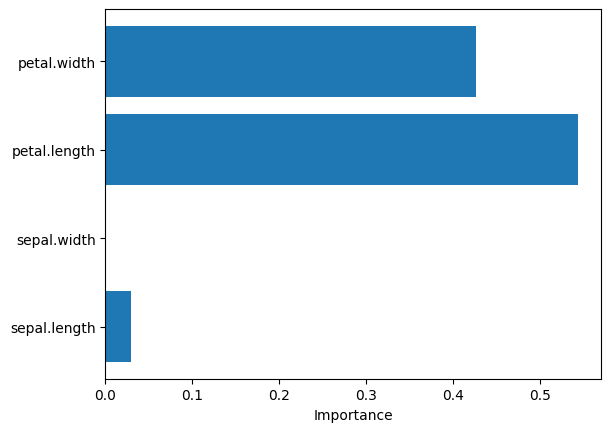

In [15]:
plt.barh(data.columns[:-1],dt_model.feature_importances_)
plt.xlabel('Importance')
plt.show()

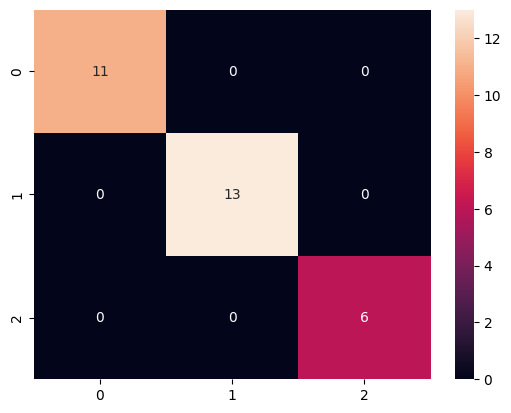

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
print(accuracy_score(y_test,rf_model.predict(X_test)))

1.0


In [19]:
print(confusion_matrix(y_test,rf_model.predict(X_test)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
print(classification_report(y_test,rf_model.predict(X_test)))   

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



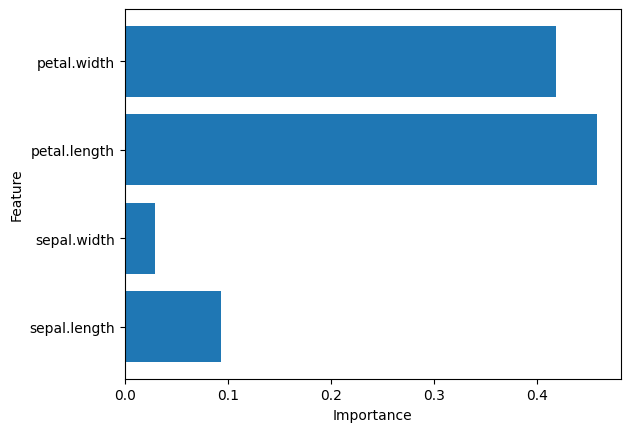

In [21]:
plt.barh(data.columns[:-1],rf_model.feature_importances_)
plt.xlabel  ('Importance')
plt.ylabel ('Feature')
plt.show()

<Axes: >

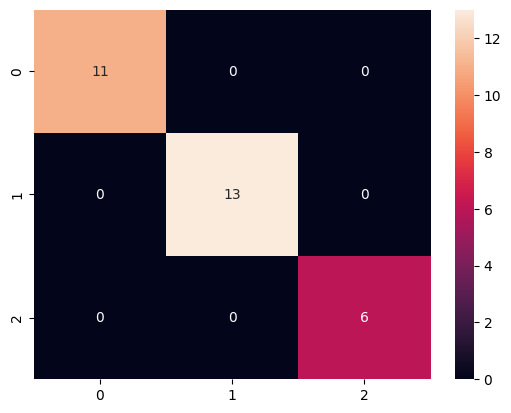

In [22]:
sns.heatmap(confusion_matrix(y_test,rf_model.predict(X_test)),annot=True,fmt='d')

In [23]:
import joblib
joblib.dump(rf_model,'model.pkl')

['model.pkl']

In [24]:
import streamlit as st
st.title("ML prediction app")
input_data=st.text_input("Enter your data in csv format")
if input_data:
    data=[float(x) for x in input_data.split(",")]
    predictions=rf_model.predict([data])
    st.write("predictions : ",predictions)  

2024-12-29 09:57:58.190 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.906 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-29 09:57:58.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 09:57:58.914 Sessi